In [1]:
#import library
import pandas as pd
import numpy as np
import nltk
import string
import csv
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import warnings
warnings.filterwarnings("ignore")

# Memasukan data training

In [3]:
#read dataset kaggle
file_path = 'keputusanmk.csv'
df = pd.read_csv(file_path)

In [4]:
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Sat Nov 18 13:31:03 +0000 2023,1725869225804435592,Akhirnya Polisi Terlibat Dalam Penyelidikan Pr...,0,0,0,0,in,1904113050,1725869225804435592,Haidary__,https://twitter.com/Haidary__/status/172586922...
1,Sat Nov 18 11:52:35 +0000 2023,1725844445973930132,Babak Baru Polemik Putusan MK soal Batas Usia ...,0,1,3,4,in,1454008204027854853,1725844445973930132,HMMurah3,https://twitter.com/HMMurah3/status/1725844445...
2,Sat Nov 18 10:12:00 +0000 2023,1725819133306998932,Ganjar Beri Nilai 5 dari 10 soal Rapor Penegak...,43,245,47,188,in,69183155,1725819133306998932,detikcom,https://twitter.com/detikcom/status/1725819133...
3,Sat Nov 18 09:21:43 +0000 2023,1725806480987914747,Sejumlah mahasiswa melakukan aksi penolakan te...,0,4,18,33,in,2695463725,1725806480987914747,triwul82,https://twitter.com/triwul82/status/1725806480...
4,Sat Nov 18 06:31:58 +0000 2023,1725763763230716368,Akhirnya Polisi Terlibat Dalam Penyelidikan Pr...,9,32,203,428,in,30201110,1725763763230716368,alisyarief,https://twitter.com/alisyarief/status/17257637...
...,...,...,...,...,...,...,...,...,...,...,...,...
811,Sat Nov 04 01:09:46 +0000 2023,1720609248759959706,@Gus_Raharjo @ganjarpranowo Sejak putusan yang...,0,0,0,0,in,1611852615368978432,1720326643502514581,s9680433,https://twitter.com/s9680433/status/1720609248...
812,Sat Nov 04 00:17:23 +0000 2023,1720596063797797265,Mahasiswa NU Gugat Putusan MK soal Batas Usia ...,0,1,0,6,in,1422120794923040770,1720596063797797265,brother_djon,https://twitter.com/brother_djon/status/172059...
813,Fri Nov 03 23:47:47 +0000 2023,1720588616219734186,Yang sedang bergerak sekarang adalah mencoba m...,0,2,0,2,in,1131410981131653120,1720588616219734186,dp_koesmirah,https://twitter.com/dp_koesmirah/status/172058...
814,Fri Nov 03 20:11:50 +0000 2023,1720534268290761127,Jimly Asshiddiqie Putusan MK Tentang Batas Mi...,0,0,0,0,in,1656234629534457857,1720534268290761127,kliknetwork,https://twitter.com/kliknetwork/status/1720534...


In [5]:
#mengambil label tweet
data = df['full_text']

In [6]:
data

0      Akhirnya Polisi Terlibat Dalam Penyelidikan Pr...
1      Babak Baru Polemik Putusan MK soal Batas Usia ...
2      Ganjar Beri Nilai 5 dari 10 soal Rapor Penegak...
3      Sejumlah mahasiswa melakukan aksi penolakan te...
4      Akhirnya Polisi Terlibat Dalam Penyelidikan Pr...
                             ...                        
811    @Gus_Raharjo @ganjarpranowo Sejak putusan yang...
812    Mahasiswa NU Gugat Putusan MK soal Batas Usia ...
813    Yang sedang bergerak sekarang adalah mencoba m...
814    Jimly Asshiddiqie  Putusan MK Tentang Batas Mi...
815    Buat yang kegirangan mendengar keputusan akhir...
Name: full_text, Length: 816, dtype: object

In [7]:
#menghapus data yang duplikat
data.drop_duplicates(inplace=True)

In [8]:
#menyimpan data tweet ke dalam csv
data.to_csv('keputusanmk.csv',index=False)

# Pre processing

In [20]:
class process:
    def __init__(self, file):
        self.file = pd.read_csv(file)

    #membaca file
    def baca(self):
        komena = self.file
        return komena
    #menyimpan file
    def simpan(self, text):
        self.file.to_excel(text)
    #merubah case follding
    def case_folding(self):
        self.file['full_text']= self.file['full_text'].str.lower()
    #menghapus angka
    def remove_number(self, text):
        def remove_number(text):
            return re.sub(r"\d+", "", text)
        self.file['full_text'] = self.file['full_text'].apply(remove_number)
    #menghapus emoticon
    def remove_punemot(self, text): #punctuation & emoticon
        self.file['full_text']= self.file['full_text'].str.replace('[^\w\s]','')
    #menghapus link
    def remove_url(self, text):
        def remove_URL(sample):
            return re.sub(r"http\S+", "", sample)
        self.file['full_text'] = self.file['full_text'].apply(remove_URL)
    #stopword
    def stopword(self, text):
        stopword = nltk.corpus.stopwords.words('indonesian')

        stopword.extend(['dehhh','wkwk', 'busukin','tersesat', 'mampus', 'aura', 'kesel','ampun','lu','loe','dehhh','la',
                         'eh','awokawoaok', 'cu', 'hehehehe','lah', 'yap','paan', 'cui', 'cak','yuuuk','coki'])

        txt_stopword = pd.read_csv('stopwords-id.txt', names= ['stopwords'], header= None) #mengunakan file txt yang berisikan kata stopword

        stopword.extend(txt_stopword['stopwords'][0].split(' '))

        stopword = set(stopword)

        def stopwords(text):
            text=  [word for word in text if word not in stopword]
            return text

        self.file['full_text']= self.file['full_text'].apply(stopwords)
    #tokenization
    def token(self, text):
        def token(text):
            text=re.split('\W+',text)
            return text
        self.file['full_text'] = self.file['full_text'].apply(token)
    #normalisasi kata
    def normalisasi(self, text):
        normalized_word = pd.read_csv('normalisasi.csv') #menggunakan file csv yanng berisikan kata normalisasi

        normalized_word_dict={}

        for index, row in normalized_word.iterrows():
            if row[0] not in normalized_word_dict:
                normalized_word_dict[row[0]] = row[1]

        def normalized_term(document):
            return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

        self.file['full_text'] = self.file['full_text'].apply(normalized_term)
    #steming
    def stemd(self,text):
        factory = StemmerFactory()
        stemmer = factory.create_stemmer()

        def stemmed_wrapper(term):
            return stemmer.stem(term)
        term_dict= {}

        for document in self.file['full_text']:
            for term in document:
                if term not in term_dict:
                    term_dict[term] = ' '

        for term in term_dict:
            term_dict[term] = stemmed_wrapper(term)

        def get_stemmed_term(document):
            return [term_dict[term] for term in document]

        self.file['full_text'] = self.file['full_text'].apply(get_stemmed_term)
    #fit stopword
    def fitt_stopword(self,text):
        def fit_stopwords(text):
            text= np.array(text)
            text= ' '.join(text)
            return(text)

        self.file['full_text']= self.file['full_text'].apply(lambda x: fit_stopwords(x))

In [21]:
dataset = process('keputusanmk.csv')

In [22]:
baca= dataset.baca()
print(baca)

                                             full_text
0    Akhirnya Polisi Terlibat Dalam Penyelidikan Pr...
1    Babak Baru Polemik Putusan MK soal Batas Usia ...
2    Ganjar Beri Nilai 5 dari 10 soal Rapor Penegak...
3    Sejumlah mahasiswa melakukan aksi penolakan te...
4    Akhirnya Polisi Terlibat Dalam Penyelidikan Pr...
..                                                 ...
780  @Gus_Raharjo @ganjarpranowo Sejak putusan yang...
781  Mahasiswa NU Gugat Putusan MK soal Batas Usia ...
782  Yang sedang bergerak sekarang adalah mencoba m...
783  Jimly Asshiddiqie  Putusan MK Tentang Batas Mi...
784  Buat yang kegirangan mendengar keputusan akhir...

[785 rows x 1 columns]


In [23]:
cf = dataset.case_folding()

In [24]:
clean1 = dataset.remove_number(cf)

In [25]:
clean2 = dataset.remove_punemot(clean1)

In [26]:
clean3 = dataset.remove_url(clean2)

In [28]:
token = dataset.token(clean3)

In [29]:
normal = dataset.normalisasi(token)

In [30]:
sw = dataset.stopword(normal)

In [31]:
stem = dataset.stemd(sw)

In [32]:
fit = dataset.fitt_stopword(stem)

In [33]:
baca= dataset.baca()
print(baca)

                                             full_text
0    polisi libat lidi proses putus mk batas usia c...
1    babak polemik putus mk batas usia capres cawap...
2    ganjar nilai rapor tega hukum era jokowi ganja...
3    mahasiswa aksi tolak kait putus mahkamah konst...
4    polisi libat lidi proses putus mk batas usia c...
..                                                 ...
780  gus raharjo ganjarpranowo putus layang ketua m...
781  mahasiswa nu gugat putus mk batas usia capresc...
782  gerak coba usaha putus mk batas usia minimal c...
783  jimly asshiddiqie putus mk batas minimal usia ...
784  girang dengar putus urus mk baca kutip artikel...

[785 rows x 1 columns]


In [112]:
simpan1 = dataset.simpan("keputusanmk_inggris.xlsx")

## menghapus duplikat teks keputusanmk_inggris

In [36]:
#read dataset kaggle
file_path = 'keputusanmk_inggris.csv'
df = pd.read_csv(file_path)

In [37]:
df.drop_duplicates(inplace=True)
df.to_csv('keputusanmk_inggris.csv',index=False)

## Klasifikasi

In [38]:
from textblob import TextBlob
import pandas as pd


class klasifikasi():

    def __init__(self, file):
        self.file = pd.read_csv(file)
        self.file['Text_English'] = self.file['Text_English'].astype(str)

    def baca(self):
        komena = self.file
        return komena

    def simpan(self, text):
        self.file.to_csv(text)
    #menjadikan textblob
    def textblob(self):
        for yt in self.file.Text_English:
            clean = yt

            blob_object = TextBlob (clean)
            hasil = blob_object.tags
            print(hasil)
    #menghitung polarity
    def polarity(self, text):
        polarityy = lambda x: TextBlob(x).sentiment.polarity

        self.file['Polarity'] = self.file['Text_English'].apply(polarityy)
   # menganalisis sentimen pada data
    def analysis(self, text):
        def analysis(score):
            if score > 0 :
                return 'positive'
            elif score == 0:
                return 'neutral'
            else:
                return 'negative'
        self.file['Score']= self.file['Polarity'].apply(analysis)
    #menghitung jumlah sentimen yang didapatkan
    def hitung(self, text):
        print('netral :', (sum(self.file['Score']=='neutral')))
        print('positif :', (sum(self.file['Score']=='positive')))
        print('negatif :', (sum(self.file['Score']=='negative')))

In [39]:
dataset2 = klasifikasi('keputusanmk_inggris.csv')

In [40]:
blob = dataset2.textblob()

[('Police', 'NNP'), ('Lids', 'NNP'), ('Lidi', 'NNP'), ('Process', 'NNP'), ('Breaking', 'NNP'), ('Mk', 'NNP'), ('Age', 'NNP'), ('Limits', 'NNP'), ('of', 'IN'), ('Fusilat', 'NNP'), ('Vice', 'NNP'), ('Presidential', 'NNP'), ('Candidates', 'NNP'), ('News', 'NNP')]
[('Polemic', 'NNP'), ('Round', 'NNP'), ('Disconnect', 'NNP'), ('Mk', 'NNP'), ('Age', 'NNP'), ('Limits', 'NNP'), ('of', 'IN'), ('Police', 'NNP'), ('Presidential', 'NNP'), ('Candidates', 'NNP'), ('Libat', 'NNP'), ('Click', 'NNP'), ('Read', 'NNP'), ('Kompascom', 'NNP'), ('Read', 'NNP'), ('News', 'NNP'), ('Advertisements', 'NNP'), ('Download', 'NNP'), ('Applications', 'NNP')]
[('Ganjar', 'NNP'), ('Report', 'NNP'), ('Card', 'NNP'), ('Value', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Law', 'NNP'), ('of', 'IN'), ('the', 'DT'), ('Jokowi', 'NNP'), ('Era', 'NNP'), ('Law', 'NNP'), ('Ganjar', 'NNP'), ('Human', 'NNP'), ('Rights', 'NNP'), ('Value', 'NNP'), ('of', 'IN'), ('Human', 'NNP'), ('Rights', 'NNP'), ('Era', 'NNP'), ('President', 'NNP'), ('

In [41]:
polar = dataset2.polarity(blob)

In [42]:
analysis = dataset2.analysis(polar)

In [43]:
htng = dataset2.hitung(analysis)

netral : 337
positif : 210
negatif : 238


In [44]:
baca= dataset2.baca()
print(baca)

     Unnamed: 0                                          full_text  \
0             0  polisi libat lidi proses putus mk batas usia c...   
1             1  babak polemik putus mk batas usia capres cawap...   
2             2  ganjar nilai rapor tega hukum era jokowi ganja...   
3             3  mahasiswa aksi tolak kait putus mahkamah konst...   
4             4  polisi libat lidi proses putus mk batas usia c...   
..          ...                                                ...   
780         780  gus raharjo ganjarpranowo putus layang ketua m...   
781         781  mahasiswa nu gugat putus mk batas usia capresc...   
782         782  gerak coba usaha putus mk batas usia minimal c...   
783         783  jimly asshiddiqie putus mk batas minimal usia ...   
784         784  girang dengar putus urus mk baca kutip artikel...   

                                          Text_English  Polarity     Score  
0    Police Lids Lidi Process Breaking Mk Age Limit...     0.000   neutral  
1    

In [45]:
simpan2 = dataset2.simpan("keputusanmk_inggris.csv")

## Analisis

In [71]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [72]:
def load_data():
  data = pd.read_csv('keputusanmk_inggris.csv')
  return data

In [73]:
df = load_data()
df

,Unnamed: 0.1,Unnamed: 0,full_text,Text_English,Polarity,Score
0,0,0,polisi libat lidi proses putus mk batas usia c...,Police Lids Lidi Process Breaking Mk Age Limit...,0.000,neutral
1,1,1,babak polemik putus mk batas usia capres cawap...,Polemic Round Disconnect Mk Age Limits of Poli...,-0.200,negative
2,2,2,ganjar nilai rapor tega hukum era jokowi ganja...,Ganjar Report Card Value of the Law of the Jok...,0.000,neutral
3,3,3,mahasiswa aksi tolak kait putus mahkamah konst...,Students of the Action Reject the Decision of ...,0.050,positive
4,4,4,polisi libat lidi proses putus mk batas usia c...,Police Lid the Lidi Process Breaking Mk Limits...,0.000,neutral
...,...,...,...,...,...,...
780,780,780,gus raharjo ganjarpranowo putus layang ketua m...,Gus Raharjo Ganjarpranowo Break up Chairperson...,-0.750,negative
781,781,781,mahasiswa nu gugat putus mk batas usia capresc...,NU Students Due to Break up Mk Age Limits of P...,-0.125,negative
782,782,782,gerak coba usaha putus mk batas usia minimal c...,MOVEMENT TRY BROKEN EFFECTS MK Minimum age lim...,-0.400,negative
783,783,783,jimly asshiddiqie putus mk batas minimal usia ...,Jimly Asshiddiqie broke up the minimum age lim...,0.000,neutral


(-0.5, 599.5, 299.5, -0.5)

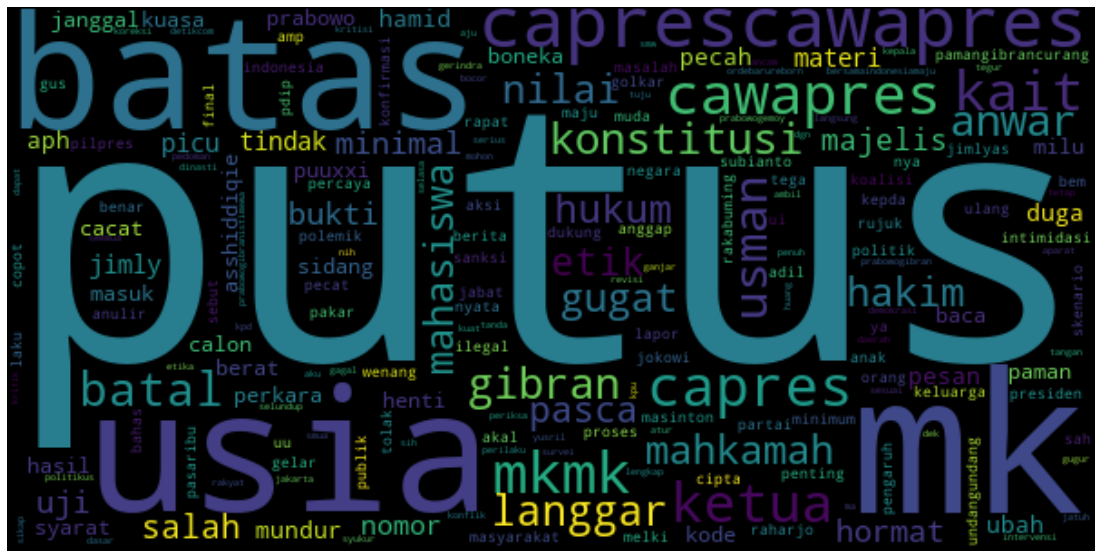

In [74]:
text = ' '.join(str(yt) for yt in df['full_text'].fillna(''))

WordCloud = WordCloud(width = 600, height = 300, random_state = 21, max_font_size = 200, collocations = False).generate(text)
plt.figure(figsize = (20,10))
plt.imshow(WordCloud, Interpolation = 'bilinear')
plt.axis('off')

In [75]:
#pemebentukan data training dan data set
df['Text_English']= df['Text_English'].astype(str)
from sklearn.model_selection import train_test_split

y= df.Score.values
x= df.Text_English.values

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1, test_size=0.2, shuffle= True)
print(x_train.shape)
print(x_test.shape)

(628,)
(157,)


In [76]:
#data train dan data set dimasukan ke proses countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary= True, stop_words ='english')
vectorizer.fit (list(x_train)+ list(x_test))

x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)
print(x_train_vec.shape)
print(x_test_vec.shape)

(628, 1792)
(157, 1792)


In [77]:
#sentimen analis dengan kernel linear dan kernel rbf

#pada kernel linear
from sklearn import svm

svm_linear= svm.SVC(kernel='linear', probability= True, C=100)
prob= svm_linear.fit(x_train_vec, y_train).predict_proba(x_test_vec)

y_pred_svm_linear= svm_linear.predict(x_test_vec)

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [79]:
print("Accuracy Linear :", accuracy_score(y_test, y_pred_svm_linear)*100,'%')
scores = cross_val_score(svm_linear, x_train_vec, y_train, cv=10)

print('\n')
print('confusion matrix linear :')
print(confusion_matrix(y_test, y_pred_svm_linear))

print('\n')
print('precision linear :', precision_score(y_test, y_pred_svm_linear, average='macro'))

print('\n')
print('recall linear :', recall_score(y_test, y_pred_svm_linear, average='macro'))

print('\n')
print('cross validation linear :', scores)

Accuracy Linear : 78.343949044586 %


confusion matrix linear :
[[35 11  2]
 [ 4 60  3]
 [ 5  9 28]]


precision linear : 0.797979797979798


recall linear : 0.7637852404643449


cross validation linear : [0.71428571 0.84126984 0.84126984 0.68253968 0.71428571 0.77777778
 0.77777778 0.79365079 0.77419355 0.82258065]


In [80]:
#pada kernel rbf
rbf= svm.SVC(kernel='rbf', probability= True, C=100, gamma= 0.01 )
prob= rbf.fit(x_train_vec, y_train).predict_proba(x_test_vec)

y_pred_svm_rbf= rbf.predict(x_test_vec)

In [81]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Accuracy RBF :", accuracy_score(y_test, y_pred_svm_rbf)*100,'%')
scores = cross_val_score(rbf, x_train_vec, y_train, cv=10)

print('\n')
print('confusion matrix rbf :')
print(confusion_matrix(y_test, y_pred_svm_rbf))

print('\n')
print('precision rbf :', precision_score(y_test, y_pred_svm_rbf, average='macro'))

print('\n')
print('recall rbf :', recall_score(y_test, y_pred_svm_rbf, average='macro'))

print('\n')
print('cross validation rbf :', scores)

Accuracy RBF : 77.07006369426752 %


confusion matrix rbf :
[[33 10  5]
 [ 3 59  5]
 [ 4  9 29]]


precision rbf : 0.775


recall rbf : 0.7528577351338545


cross validation rbf : [0.73015873 0.85714286 0.84126984 0.66666667 0.77777778 0.80952381
 0.80952381 0.82539683 0.85483871 0.85483871]


In [82]:
import joblib

In [83]:
joblib.dump(svm_linear, 'linear_svm_model.joblib') 

['linear_svm_model.joblib']

In [84]:
joblib.dump(rbf, 'rbf_svm_model.joblib')

['rbf_svm_model.joblib']

# Mencoba model dengan data tes twitter

In [97]:
#read dataset kaggle
file_path = 'PutusanMK1.csv'
df = pd.read_csv(file_path)
df.drop_duplicates(inplace=True)
df = data = df['full_text']
df.to_csv('PutusanMK1.csv',index=False)

In [98]:
dataset = process('PutusanMK1.csv')

In [99]:
cf = dataset.case_folding()

In [100]:
clean1 = dataset.remove_number(cf)

In [101]:
clean2 = dataset.remove_punemot(clean1)

In [102]:
clean3 = dataset.remove_url(clean2) 

In [103]:
token = dataset.token(clean3)

In [104]:
normal = dataset.normalisasi(token)

In [105]:
sw = dataset.stopword(normal)

In [106]:
stem = dataset.stemd(sw)

In [107]:
fit = dataset.fitt_stopword(stem)

In [108]:
baca= dataset.baca()
print(baca)

                                            full_text
0                                         sabar fokus
1   ahli final mengikatsudah serang promosi progra...
2                         takut kalah usik beda dikit
3                                              dukung
4   usik luar nalar akal sehat bodoh ya olah diam ...
..                                                ...
88                                         mental dab
89                 kuasa intervensi yudikatif kalimat
90  nang jare banteng lha nang hasto nang rudy nan...
91                                    bahaya iki njar
92                                     sarjana hukum 

[93 rows x 1 columns]


In [113]:
simpan1 = dataset.simpan("PutusanMK1_inggris.xlsx")

In [116]:
dataset2 = klasifikasi('PutusanMK1_inggris.csv')

In [117]:
blob = dataset2.textblob()

[('Patiently', 'RB'), ('focus', 'VB')]
[('The', 'DT'), ('final', 'JJ'), ('expert', 'NN'), ('binds', 'VBZ'), ('the', 'DT'), ('promotion', 'NN'), ('of', 'IN'), ('the', 'DT'), ('promotion', 'NN'), ('of', 'IN'), ('the', 'DT'), ('program', 'NN'), ('is', 'VBZ'), ('just', 'RB'), ('like', 'IN'), ('a', 'DT'), ('representative', 'NN')]
[('afraid', 'NN'), ('of', 'IN'), ('losing', 'VBG'), ('a', 'DT'), ('little', 'JJ'), ('bit', 'NN'), ('of', 'IN'), ('use', 'NN')]
[('support', 'NN')]
[('usik', 'JJ'), ('outside', 'IN'), ('reasoning', 'VBG'), ('common', 'JJ'), ('sense', 'NN'), ('stupid', 'JJ'), ('yes', 'RB'), ('anger', 'JJ'), ('angry', 'JJ'), ('events', 'NNS'), ('of', 'IN'), ('legal', 'JJ'), ('products', 'NNS'), ('Lagger', 'NNP'), ('Ethics', 'NNPS'), ('Severe', 'NNP'), ('wrong', 'JJ'), ('pace', 'NN'), ('of', 'IN'), ('the', 'DT'), ('president', 'NN'), ("'s", 'POS'), ('child', 'NN')]
[('Mas', 'NNP'), ('Ganjarpranowo', 'NNP'), ('I', 'PRP'), ('forgot', 'VBD'), ('that', 'IN'), ('the', 'DT'), ('parents', 'N

In [118]:
polar = dataset2.polarity(blob)

In [119]:
analysis = dataset2.analysis(polar)

In [120]:
htng = dataset2.hitung(analysis)

netral : 43
positif : 21
negatif : 28


In [121]:
baca= dataset2.baca()
print(baca)

    Unnamed: 0                                          full_text  \
0            0                                        sabar fokus   
1            1  ahli final mengikatsudah serang promosi progra...   
2            2                        takut kalah usik beda dikit   
3            3                                             dukung   
4            4  usik luar nalar akal sehat bodoh ya olah diam ...   
..         ...                                                ...   
87          88                                         mental dab   
88          89                 kuasa intervensi yudikatif kalimat   
89          90  nang jare banteng lha nang hasto nang rudy nan...   
90          91                                    bahaya iki njar   
91          92                                     sarjana hukum    

                                         Text_English  Polarity     Score  
0                                     Patiently focus  0.000000   neutral  
1   The final exper

In [122]:
simpan2 = dataset2.simpan("PutusanMK1_inggris_class.csv")

In [124]:
# Load Linear SVM model
loaded_linear_model = joblib.load('linear_svm_model.joblib')

# Load RBF SVM model
loaded_rbf_model = joblib.load('rbf_svm_model.joblib')

In [125]:
import pandas as pd

new_data = pd.read_csv('PutusanMK1_inggris_class.csv')


new_text_data = new_data['Text_English'].astype(str)

In [126]:
x_new_vec = vectorizer.transform(new_text_data)

In [127]:
# prediksi Linear SVM
predictions_linear = loaded_linear_model.predict(x_new_vec)

# prediksi RBF SVM
predictions_rbf = loaded_rbf_model.predict(x_new_vec)

In [128]:
# prediksi Linear SVM
print("Linear SVM Predictions:")
print(predictions_linear)

Linear SVM Predictions:
['neutral' 'neutral' 'neutral' 'neutral' 'negative' 'positive' 'positive'
 'neutral' 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'positive'
 'neutral' 'neutral' 'positive' 'negative' 'neutral' 'positive' 'negative'
 'neutral' 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'positive' 'neutral'
 'neutral' 'neutral' 'positive' 'neutral' 'neutral' 'negative' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'negative'
 'neutral' 'neutral' 'neutral' 'neutral' 'positive' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'neutral'
 'negative' 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral']


In [129]:
# prediksi RBF SVM
print("\nRBF SVM Predictions:")
print(predictions_rbf)


RBF SVM Predictions:
['neutral' 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'neutral'
 'neutral' 'positive' 'neutral' 'positive' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'positive'
 'neutral' 'neutral' 'positive' 'neutral' 'neutral' 'positive' 'negative'
 'neutral' 'neutral' 'negative' 'neutral' 'negative' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'positive' 'neutral' 'neutral' 'negative' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'negative'
 'negative' 'neutral' 'neutral' 'neutral' 'positive' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'negative' 'neutral' 'neutral' 'neutral' 'negative' 'neutral' 'neutral'
 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral' 'neutral'
 'neutral']


In [130]:
from collections import Counter

linear_counts = Counter(predictions_linear)

rbf_counts = Counter(predictions_rbf)

print("Linear SVM Prediction Counts:")
print(linear_counts)

print("\nRBF SVM Prediction Counts:")
print(rbf_counts)

Linear SVM Prediction Counts:
Counter({'neutral': 71, 'negative': 11, 'positive': 10})

RBF SVM Prediction Counts:
Counter({'neutral': 74, 'negative': 11, 'positive': 7})


In [131]:
new_data['Linear_Predictions'] = predictions_linear
new_data['RBF_Predictions'] = predictions_rbf

new_data.to_csv('hasilprediksi.csv', index=False)